In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features_df = pd.read_csv('D:\Academics\GitHub\learn\churn_predictor\data\processed\Dataset_engineered.csv')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Yash Chaudhary\AppData\Local\Temp\ipykernel_29640\2932314940.py:1: SyntaxWarning: invalid escape sequence '\A'
  features_df = pd.read_csv('D:\Academics\GitHub\learn\churn_predictor\data\processed\Dataset_engineered.csv')


In [4]:
features_df.head()

,age,num_subscription_pauses,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,...,signup_recency,engagement_score,session_frequency,song_diversity_ratio,social_activity_score,pause_frequency,notification_engagement_rate,activity_recency_score,engagement_diversity,churn_risk_score
0,32.0,2,22.391362,105.394516,0.176873,169,109,18,32,52,...,0.549624,7.547554,0.212453,0.644970,0.466781,0.037360,0.938776,0.579280,4.867949,0.537424
1,64.0,3,29.294210,52.501115,0.981811,55,163,44,33,12,...,0.991444,1.877504,0.557973,2.963636,0.265748,0.031067,0.755102,0.549157,5.564239,0.344573
2,51.0,2,15.400312,24.703696,0.048411,244,117,20,129,50,...,0.119097,15.843835,0.623401,0.479508,0.574907,0.172414,0.775510,0.669696,7.597249,0.750815
3,63.0,4,22.842084,83.595480,0.035691,442,252,47,120,55,...,0.990418,19.350248,0.273245,0.570136,0.501836,0.041465,0.489796,0.428443,11.032268,0.583906
4,54.0,3,23.151163,52.578266,0.039738,243,230,41,66,40,...,0.031485,10.496233,0.440318,0.946502,0.462920,0.978261,0.959184,0.654645,9.934706,0.997084


In [5]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 125000 non-null  float64
 1   num_subscription_pauses             125000 non-null  int64  
 2   weekly_hours                        125000 non-null  float64
 3   average_session_length              125000 non-null  float64
 4   song_skip_rate                      125000 non-null  float64
 5   weekly_songs_played                 125000 non-null  int64  
 6   weekly_unique_songs                 125000 non-null  int64  
 7   num_favorite_artists                125000 non-null  int64  
 8   num_platform_friends                125000 non-null  int64  
 9   num_playlists_created               125000 non-null  int64  
 10  num_shared_playlists                125000 non-null  int64  
 11  notifications_clicked     

In [6]:
# Calculate correlation with the target variable
correlation_with_churn = features_df.corr()['churned'].sort_values(ascending=False)
print("\nCorrelation with Churn:")
display(correlation_with_churn)


Correlation with Churn:


churned                               1.000000
customer_service_inquiries_encoded    0.371163
subscription_Free                     0.321023
num_subscription_pauses               0.183022
song_skip_rate                        0.160186
churn_risk_score                      0.130236
subscription_Student                  0.069283
age                                   0.043115
weekly_unique_songs                   0.019357
pause_frequency                       0.009925
song_diversity_ratio                  0.008589
payment_Apple Pay                     0.006416
engagement_score                      0.004947
engagement_diversity                  0.004206
num_shared_playlists                  0.003826
location_encoded                      0.003824
payment_Debit Card                    0.001845
tenure_days                           0.001203
signup_recency                        0.001203
weekly_songs_played                   0.000908
social_activity_score                -0.000755
payment_plan_

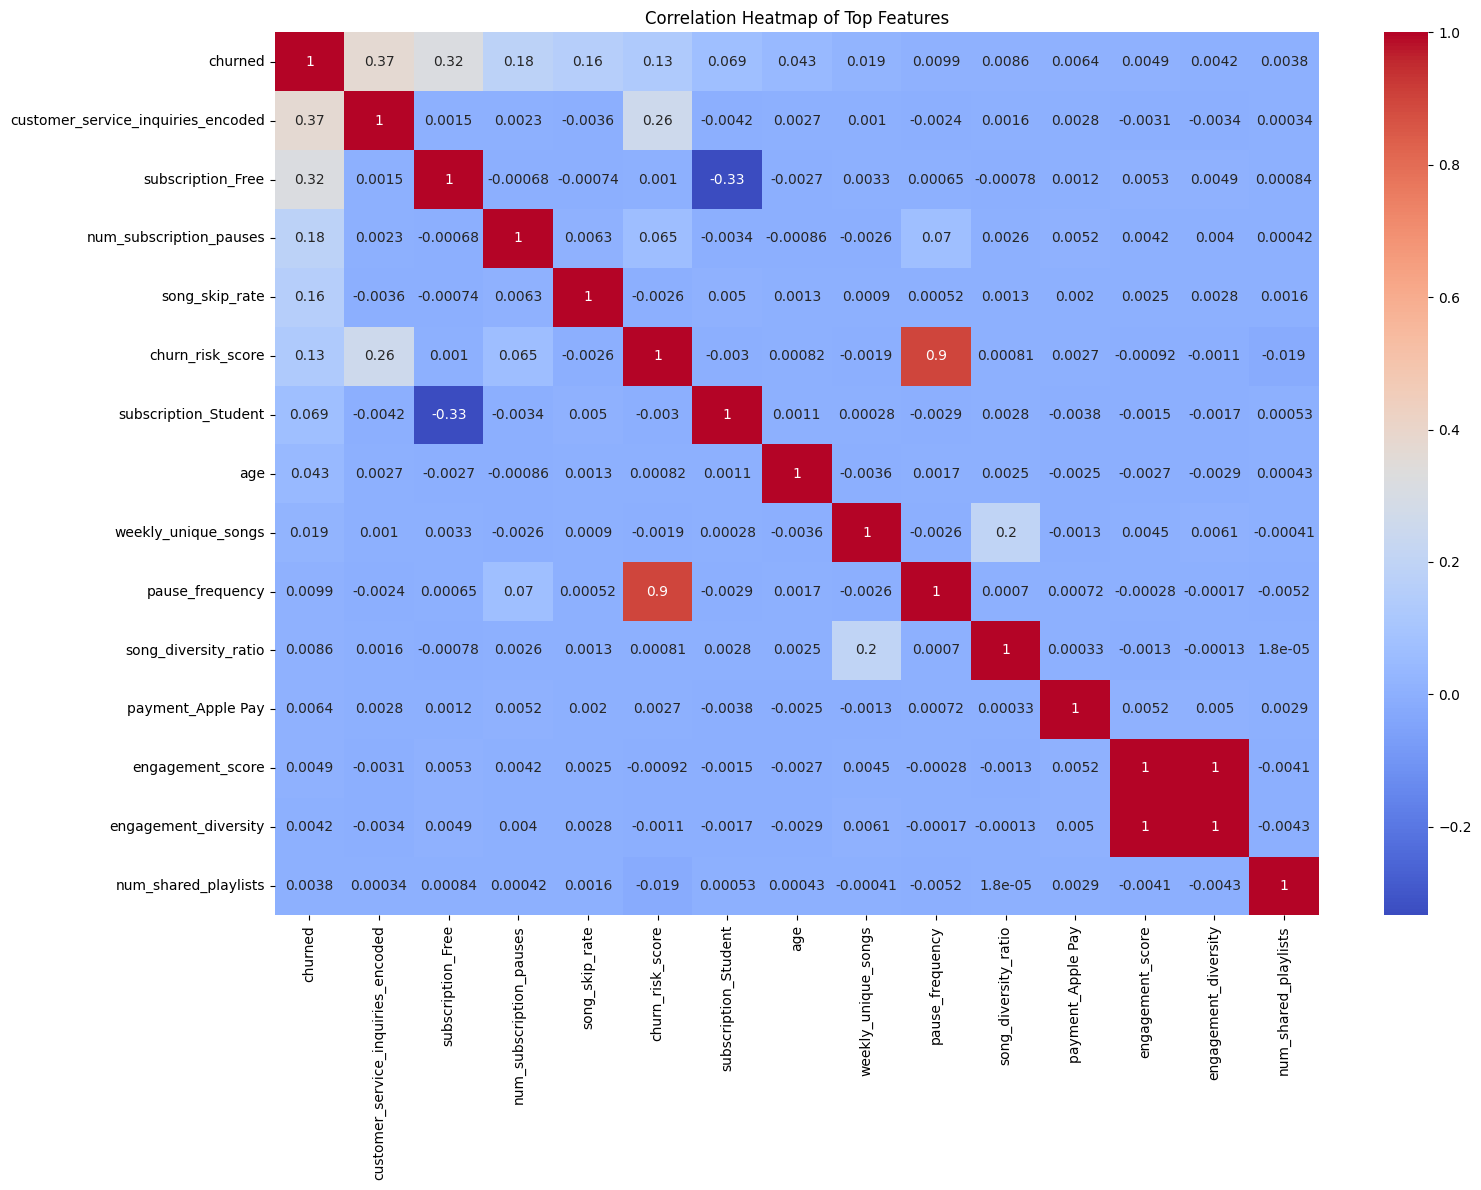

In [7]:
# Visualize correlations
plt.figure(figsize=(16, 12))
top_corr_features = correlation_with_churn.index[:15]  # Top 15 features
sns.heatmap(features_df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

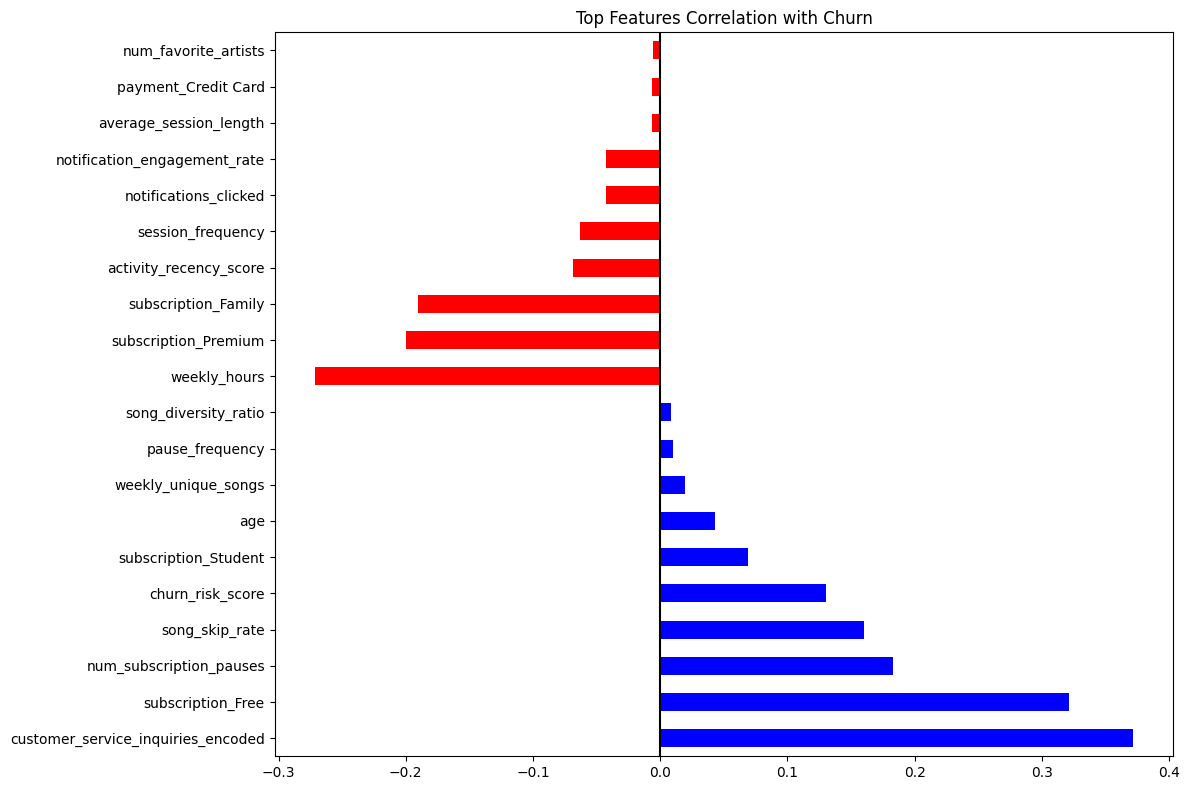

In [8]:
# Plot the top features correlation with churn
plt.figure(figsize=(12, 8))
correlation_with_churn = correlation_with_churn.drop('churned')  # Remove self-correlation
top_positive = correlation_with_churn.sort_values(ascending=False).head(10)
top_negative = correlation_with_churn.sort_values(ascending=True).head(10)
top_features = pd.concat([top_positive, top_negative])
top_features.plot(kind='barh', color=['blue' if x > 0 else 'red' for x in top_features])
plt.title('Top Features Correlation with Churn')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
X = features_df.drop('churned', axis=1)
y = features_df['churned']

In [15]:
# Calculate mutual information (for both linear and non-linear relationships)
# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("\nMutual Information Scores (Higher indicates more predictive power):")
display(mi_scores)


Mutual Information Scores (Higher indicates more predictive power):


customer_service_inquiries_encoded    0.076772
churn_risk_score                      0.074641
subscription_Free                     0.059437
weekly_hours                          0.051917
engagement_diversity                  0.031325
engagement_score                      0.031300
session_frequency                     0.029674
subscription_Premium                  0.024675
num_subscription_pauses               0.023313
song_skip_rate                        0.022690
subscription_Family                   0.019739
pause_frequency                       0.017391
age                                   0.015714
activity_recency_score                0.011383
payment_plan_encoded                  0.011222
subscription_Student                  0.006436
payment_Paypal                        0.004565
notification_engagement_rate          0.004260
payment_Debit Card                    0.003560
notifications_clicked                 0.003360
payment_Apple Pay                     0.002676
num_platform_

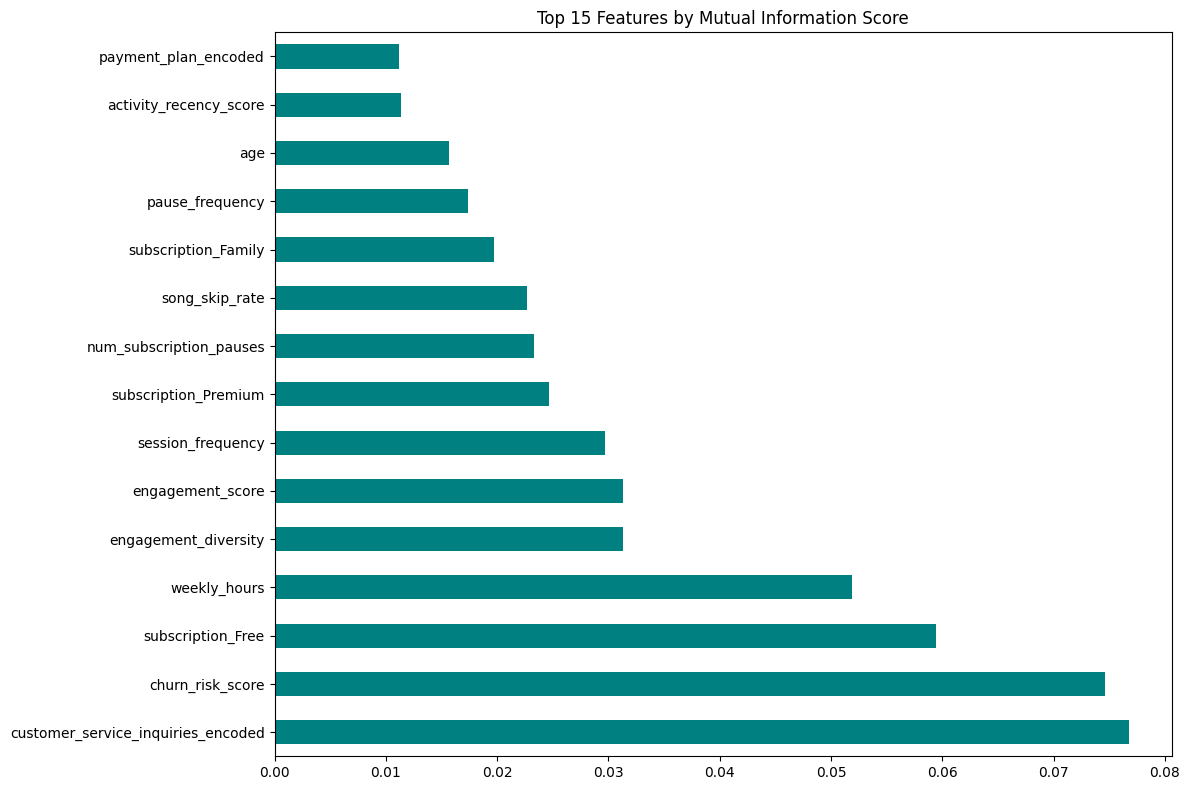

In [16]:
# Visualize mutual information scores
plt.figure(figsize=(12, 8))
mi_scores.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Features by Mutual Information Score')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Random Forest feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_importance = rf_importance.sort_values(ascending=False)

print("Top 15 features by Random Forest importance:")
print(rf_importance.head(15))

Top 15 features by Random Forest importance:
churn_risk_score                      0.084809
customer_service_inquiries_encoded    0.082273
weekly_hours                          0.074965
subscription_Free                     0.074699
song_skip_rate                        0.064600
age                                   0.044406
num_subscription_pauses               0.041178
engagement_score                      0.037771
session_frequency                     0.036048
engagement_diversity                  0.035417
subscription_Family                   0.026581
subscription_Premium                  0.025692
pause_frequency                       0.025394
average_session_length                0.024245
activity_recency_score                0.023747
dtype: float64


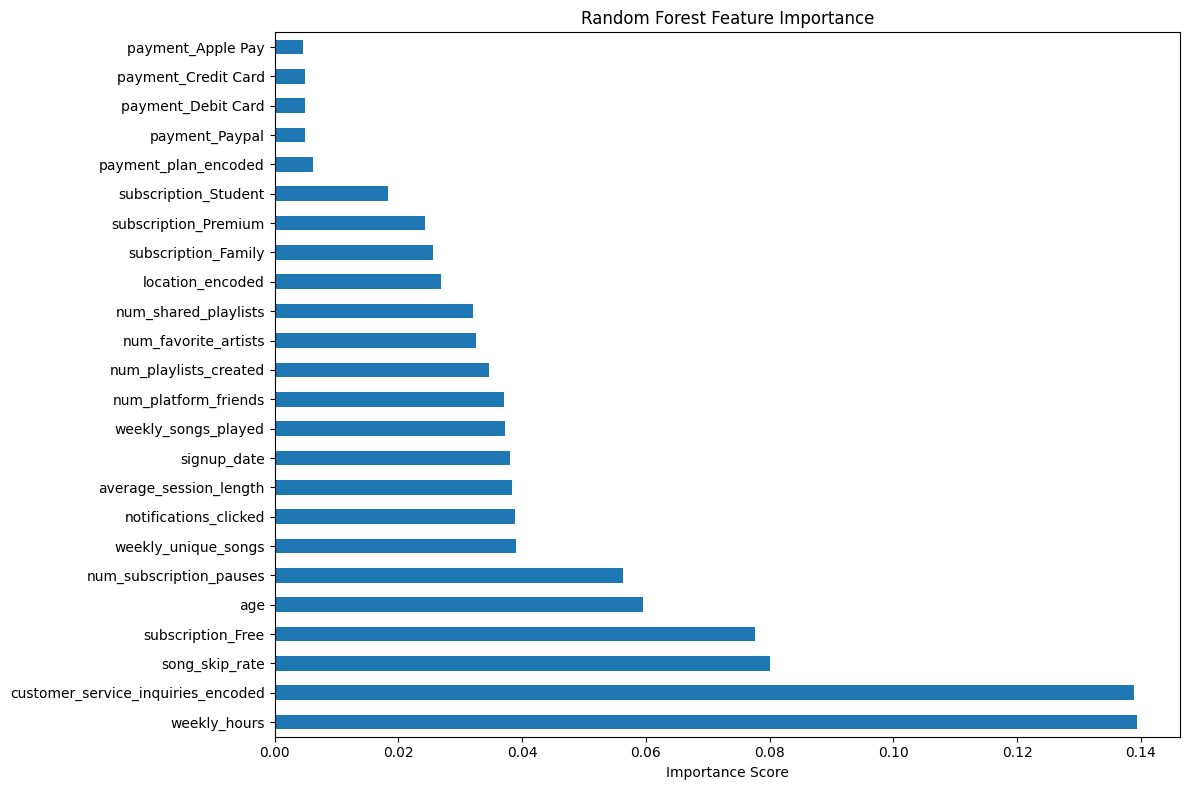

In [27]:
# Plot feature importance
plt.figure(figsize=(12, 8))
rf_importance.plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.inspection import permutation_importance

In [ ]:
# Calculate permutation importance
result = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance = pd.Series(result.importances_mean, index=X.columns)
perm_importance = perm_importance.sort_values(ascending=False)

print("Top 10 features by Permutation importance:")
print(perm_importance.head(10))

# Also show standard deviation to assess stability
perm_importance_std = pd.Series(result.importances_std, index=X.columns)
perm_importance_std = perm_importance_std.reindex(perm_importance.index)
print("\nStandard deviation of importance scores:")
print(perm_importance_std.head(10))

Top 10 features by Permutation importance:
customer_service_inquiries_encoded    0.212754
weekly_hours                          0.164237
num_subscription_pauses               0.111890
subscription_Free                     0.111344
song_skip_rate                        0.101310
age                                   0.089131
notifications_clicked                 0.030982
subscription_Premium                  0.030528
subscription_Student                  0.030360
subscription_Family                   0.023490
dtype: float64

Standard deviation of importance scores:
customer_service_inquiries_encoded    0.000937
weekly_hours                          0.000525
num_subscription_pauses               0.000714
subscription_Free                     0.000565
song_skip_rate                        0.000496
age                                   0.000429
notifications_clicked                 0.000201
subscription_Premium                  0.000283
subscription_Student                  0.000313
subscri

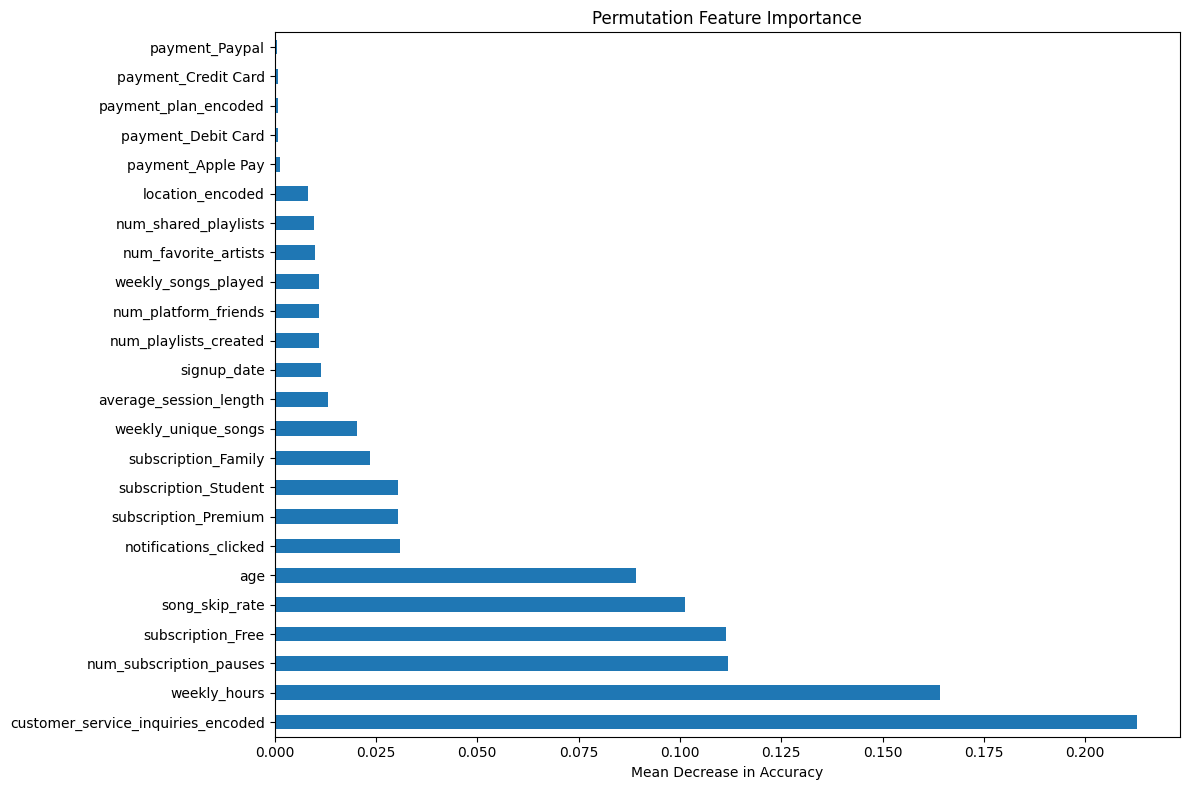

In [30]:
# Plot permutation importance
plt.figure(figsize=(12, 8))
perm_importance.plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.xlabel('Mean Decrease in Accuracy')
plt.tight_layout()
plt.show()

In [45]:
df_engineered = features_df.copy()

In [ ]:
df_engineered['tenure_days'] = abs(df_engineered['signup_date'])
#Normalized Signup_recency feature
df_engineered['signup_recency'] = df_engineered['tenure_days'] / df_engineered['tenure_days'].max()

In [48]:
df_engineered['engagement_score'] = df_engineered.apply(lambda row: row['weekly_songs_played'] / row['weekly_hours'] if row['weekly_hours'] > 0 else 0, axis=1)

In [49]:
df_engineered['session_frequency'] = df_engineered.apply(
        lambda row: row['weekly_hours'] / row['average_session_length'] if row['average_session_length'] > 0 else 0,
        axis=1
    )

In [51]:
df_engineered['song_diversity_ratio'] = df_engineered.apply(
        lambda row: row['weekly_unique_songs'] / row['weekly_songs_played'] if row['weekly_songs_played'] > 0 else 0,
        axis=1
    )

In [52]:
# Calculate social activity score
max_friends = df_engineered['num_platform_friends'].max() or 1
max_playlists = df_engineered['num_playlists_created'].max() or 1
max_shared = df_engineered['num_shared_playlists'].max() or 1

df_engineered['social_activity_score'] = (
    (df_engineered['num_platform_friends'] / max_friends) +
    (df_engineered['num_playlists_created'] / max_playlists) +
    (df_engineered['num_shared_playlists'] / max_shared)
) / 3

In [53]:
# Pause frequency normalized by tenure
df_engineered['pause_frequency'] = df_engineered.apply(
    lambda row: row['num_subscription_pauses'] / (row['tenure_days'] / 30) if row['tenure_days'] > 0 else 0,
    axis=1
)

In [54]:
# Notification engagement rate
max_notifications = df_engineered['notifications_clicked'].max() or 1
df_engineered['notification_engagement_rate'] = df_engineered['notifications_clicked'] / max_notifications

In [55]:
df_engineered['activity_recency_score'] = (
    (df_engineered['notification_engagement_rate'] * 0.4) +
    (df_engineered['session_frequency'] * 0.3) +
    (df_engineered['social_activity_score'] * 0.3)
)

In [57]:
df_engineered['engagement_diversity'] = df_engineered['engagement_score'] * df_engineered['song_diversity_ratio']

In [60]:
df_engineered['churn_risk_score'] = (
        df_engineered['pause_frequency'] * 0.3 +
        (1 - df_engineered['engagement_score'] / (df_engineered['engagement_score'].max() or 1)) * 0.2 +
        df_engineered['customer_service_inquiries_encoded'] * 0.2 +
        (1 - df_engineered['activity_recency_score']) * 0.3
    )

In [62]:
df_engineered.drop(columns=['signup_date'], inplace=True)

In [65]:
df_engineered.to_csv('../data/processed/Dataset_engineered.csv', index=False)